### READ ME

Use the code blocks below to answer each quiz question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [23]:
# Question 0: Create a DataFrame with three rows and four columns. Name the
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


# Import Data

In [24]:
# Question 1: Create a function to import the data that allows a user to enter a path to a csv file
# and include a parameter that allows them to decide whether they want to display the number
# of rows and columns in the dataset. Also, allow the user to randomly sample the dataset
# size down to an inputted number of rows that is defaulted to 500. Always use a random seed = 1

def import_data(path, num_samples=500, random_state=1, messages=True):
  import pandas as pd
      
  df = pd.read_csv(path)

  if num_samples > 0: df = df.sample(n=num_samples, random_state=random_state)
  
  if messages: print(df.shape)
  
  return df


In [25]:
# Question 2: Call that function using the dataset provided with this assignment. Sub-sample the dataset down
# to 500 rows using the parameter provided in the function you created. Specify the parameter
# needed to allow the function to print the shape of the DataFrame

# Print the last five rows of the dataframe

df = import_data('../../Data/tw_tweets_users_media.csv', num_samples=500, messages=True)

df.tail()

(500, 25)


,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,likes,...,source,author_followers_count,author_following_count,author_tweet_count,author_listed_count,author_verified,media_type,height,width,preview_image_url
84,Curious about the Coronavirus? Where it came f...,6,0,0,0,0,2,2020-01-31T15:45:10.000Z,en,0,...,The Social Jukebox,85885,70720,54,955,False,photo,606,1007,https://pbs.twimg.com/media/EPnugCjX4AIn6tK.jpg
5220,Remember to take it one day at the time! 💐 🌷 🌹...,1,0,0,5,0,1,2020-04-24T20:13:02.000Z,en,1,...,SocialBee.io v2,241,563,98,7,False,photo,1080,1080,https://pbs.twimg.com/media/EWZRWklX0AI4Xv3.jpg
22827,Death by Indifference... health inequalities s...,1,1,0,1,0,1,2021-07-19T13:04:16.000Z,en,3,...,Twitter Web App,1937,4985,95,34,False,photo,2304,4096,https://pbs.twimg.com/media/E6qT_H5WYAgnGc_.jpg
5794,I’ve been taking treats to my Autistic kiddos ...,3,0,0,1,0,1,2020-04-29T23:26:07.000Z,en,50,...,Twitter for iPhone,2519,2564,95,38,False,photo,2048,1538,https://pbs.twimg.com/media/EWztfW_U8AEwuj4.jpg
4179,Children and adults living with autism may fin...,1,0,0,2,0,2,2020-04-15T16:15:13.000Z,en,1,...,Hootsuite Inc.,568,552,100,15,False,photo,630,1200,https://pbs.twimg.com/media/EVqEndtXkAEzcQ_.jpg


# Explore Data

In [26]:
# Question 3: Create a function to calculate the following univariate properties: data type, number of missing values,
# number of unique values, min, median, max, mode, mean, standard deviation, and skewness. These metrics
# should be summarized in a table as demonstrated in the chapter. However, do not include any measures other
# than those listed here. Create the function so that the appropriate metrics will be only calculated for the
# correct data types: categorical or numeric as demonstrated in the chapter example.

# Also print out a countplot for every categorical or binary (only two values) feature. To keep this simple,
# do not calculate histograms for each numeric feature (although that would normally be a good idea). You can
# choose the exact display formats for both the univariate properties and visualizations. There is an example
# in the chapter of this type of function. If you copy that example, you will need to remove the histogram
# loop. In addition, you'll need to remove any metrics calculated in the function from the book that aren't
# required for this question.

def univariate(df, sample=500):
  import pandas as pd
  import seaborn as sns
  import matplotlib.pyplot as plt
  
  df_results = pd.DataFrame(columns=['type', 'missing', 'unique', 'min', 'median',
                                     'max', 'mode', 'mean', 'std', 'skew'])
  
  for col in df:
    # Features that apply to all dtypes
    dtype = df[col].dtype
    missing = df[col].isna().sum()
    unique = df[col].nunique()
    mode = df[col].mode()[0]
    if pd.api.types.is_numeric_dtype(df[col]):
      # Features for numeric dtypes only
      min = df[col].min()
      max = df[col].max()
      mean = df[col].mean()
      median = df[col].median()
      std = df[col].std()
      skew = df[col].skew()
      df_results.loc[col] = [dtype, missing, unique, min, median, max, mode,
                            round(mean, 2), round(std, 2), round(skew, 2)]
    else:
      # Features for object dtypes only
      df_results.loc[col] = [dtype, missing, unique, '-', '-', '-', mode, '-', '-', '-']

  # Make a sub-DataFrame of features that are objects or have only two values; they will need countplots
  countplots = df_results[(df_results['type']=='object') | (df_results['unique']==2)]

  # Create a set of countplots for the categorical features
  f, ax = plt.subplots(1, countplots.shape[0], figsize=[countplots.shape[0] * 1.5, 1.5])
  for i, col in enumerate(countplots.index):
    g = sns.countplot(data=df, x=col, color='g', ax=ax[i]);
    g.set_yticklabels('')
    g.set_ylabel('')
    ax[i].tick_params(labelrotation=90, left=False)
    ax[i].xaxis.set_label_position('top')
    sns.despine(left=True, top=True, right=True)

  plt.subplots_adjust(hspace=2, wspace=.5)
  plt.show()
  
  return df_results

c:\Users\logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129318 (\N{FACE PALM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128073 (\N{WHITE RIGHT POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128159 (\N{HEART DECORATION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPyt

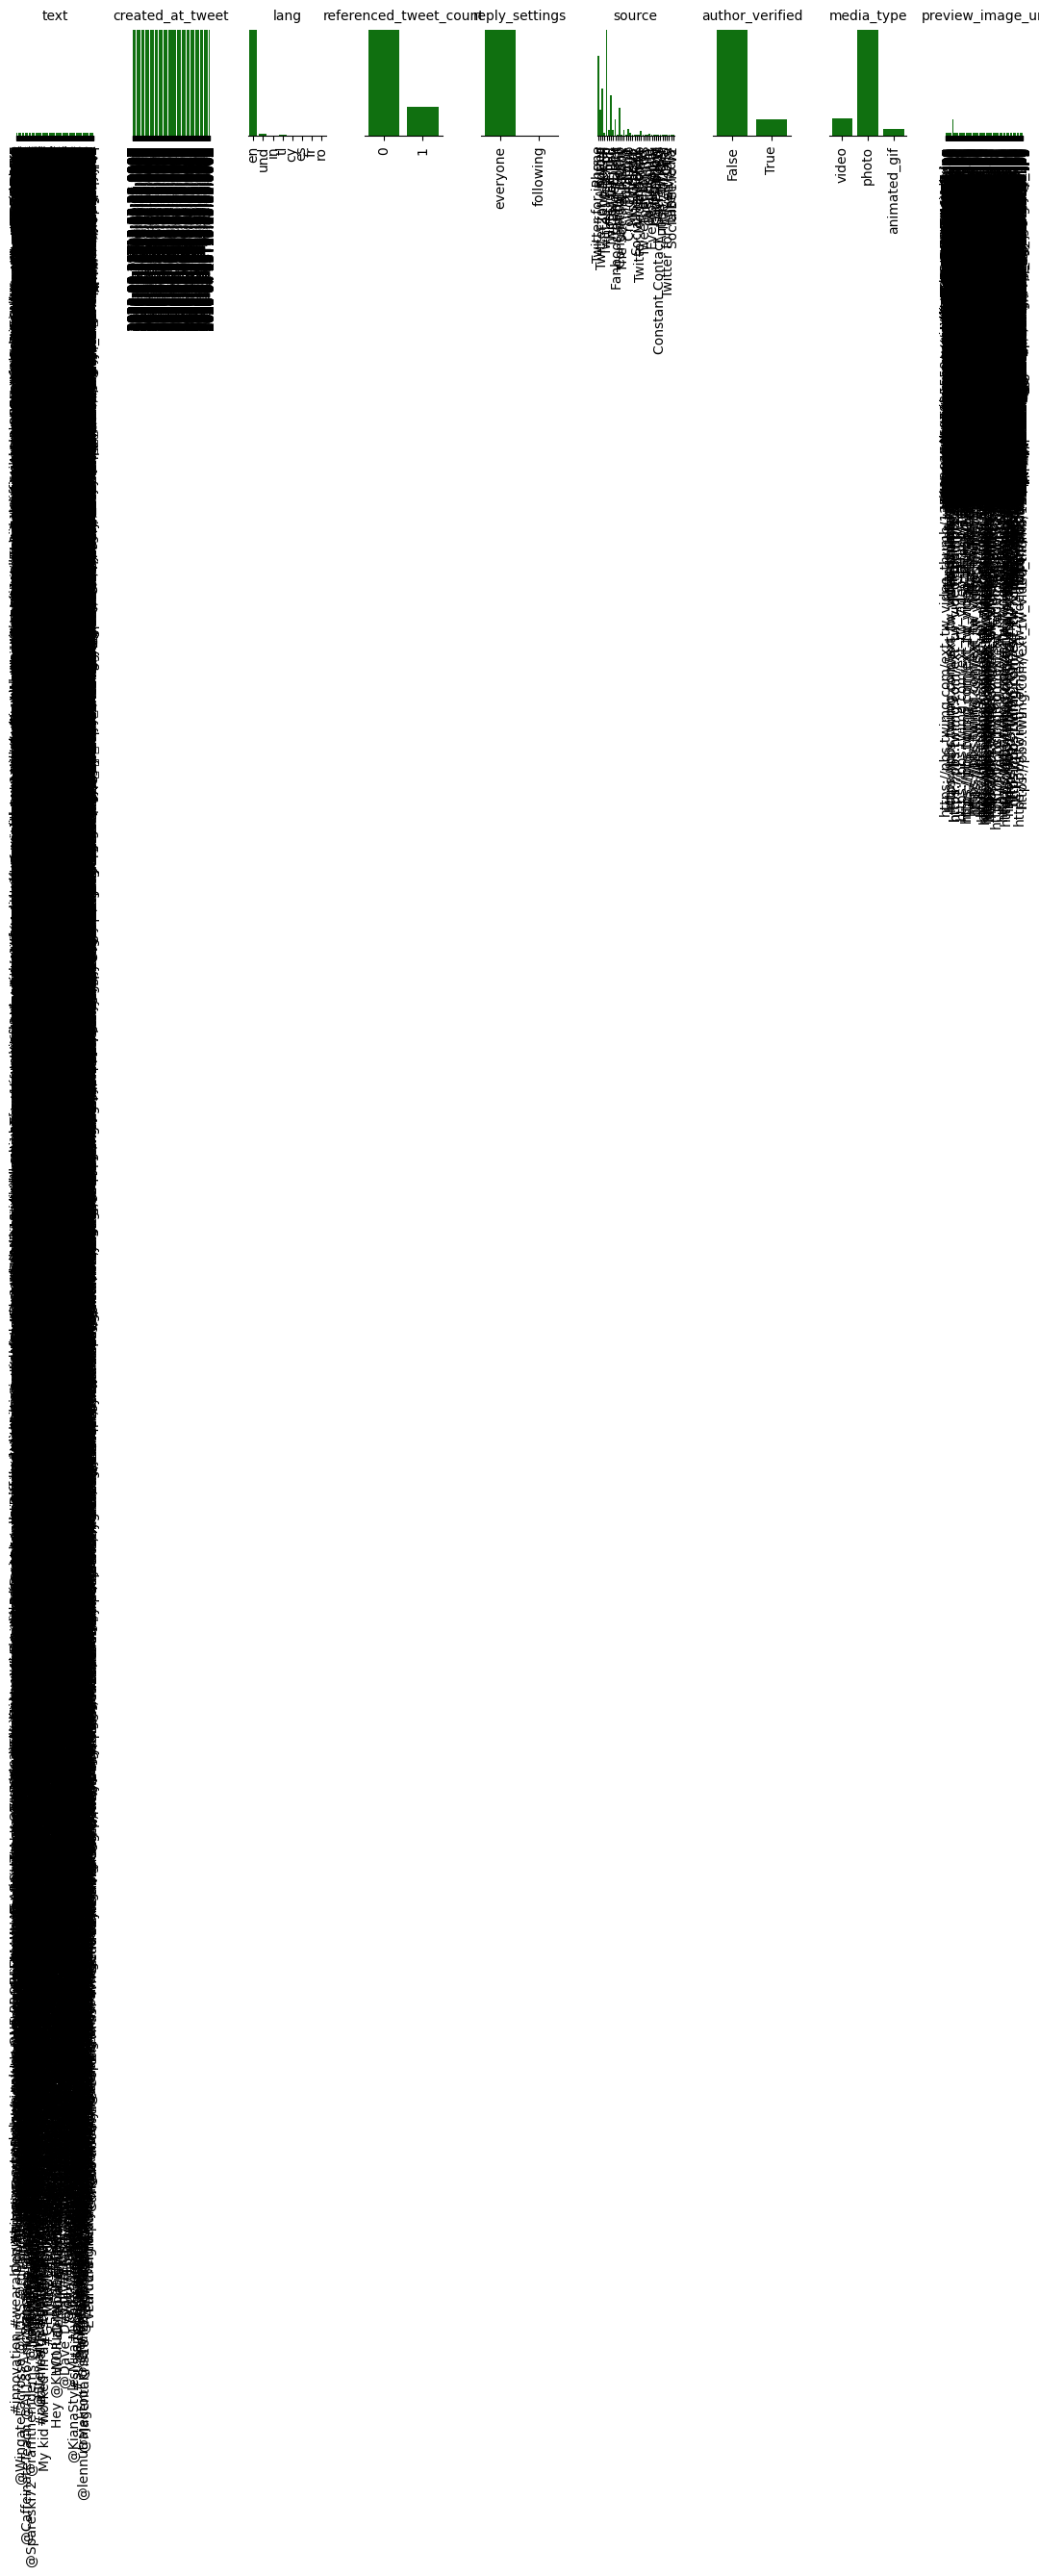

,type,missing,unique,min,median,max,mode,mean,std,skew
text,object,0,460,-,-,-,"RT @juliemcd1875: For the first time,in almost...",-,-,-
context_annotations_count,int64,0,16,0,1.0,20,1,2.11,2.23,3.32
count_annotations,int64,0,7,0,0.0,6,0,0.5,0.84,2.25
count_cashtags,int64,0,1,0,0.0,0,0,0.0,0.0,0.0
count_hashtags,int64,0,21,0,1.0,25,0,2.8,4.03,2.58
count_mentions,int64,0,1,0,0.0,0,0,0.0,0.0,0.0
count_urls,int64,0,4,1,2.0,4,2,1.62,0.66,1.14
created_at_tweet,object,0,500,-,-,-,2020-01-31T15:45:10.000Z,-,-,-
lang,object,0,8,-,-,-,en,-,-,-
likes,int64,0,54,0,1.0,764,0,11.34,55.95,9.78


In [27]:
# Qustion 4: Call the function you created using the 500 row sample of data you imported

univariate(df)

# Data Preparation

In [28]:
# Question 5: Based on the univariate analyses in the prior step, it appears that we need to drop a few features and bin some categorical
# values of some of the features. First, the features "text" and "preview_image_url" contain too many unique values to dummy
# code for modeling. Let's drop those. Also, notice from the countplot generated for the "reply_settings" feature that almost
# every record is set to "everyone". In other words, this feature will not be reliable when predicting and we need to drop it as well.
# Lastly, we have four options for labels that would indicate how 'viral' each post is: quotes, likes, replies,
# and retweets. To simplify the label, let's create a new label that is the sum of each of these outcomes and then drop each
# of those individual labels.

# Create a function that will perform the steps described above. This function will be used only for this dataset since it is so 
# specific to these features. You do not need to give this function logic to make these decisions dynamically. Just make
# it manually perform those steps and return the updated DataFrame. Here are the steps listed in order:

# 1. Drop 'text', 'preview_image_url', 'reply_settings'
# 2. Generate 'reach' as the sum of 'likes', 'quotes', 'replies', and 'retweets'
# 3. Drop 'likes', 'quotes', 'replies', and 'retweets'

# Run this function in the full pipeline (i.e. after importing the entire dataset) and then print out all remaining feature
# names one-at-a-time.

def clean_data(df):
  import pandas as pd

  df = df.drop(columns=['text', 'preview_image_url', 'reply_settings'])
  df['reach'] = df['likes'] + df['quotes'] + df['replies'] + df['retweets']
  df = df.drop(columns=['likes', 'quotes', 'replies', 'retweets'])

  return df

df = import_data('../../Data/tw_tweets_users_media.csv', num_samples=0, messages=False)
df = clean_data(df.copy())

for col in df:
  print(col)


context_annotations_count
count_annotations
count_cashtags
count_hashtags
count_mentions
count_urls
created_at_tweet
lang
referenced_tweet_count
source
author_followers_count
author_following_count
author_tweet_count
author_listed_count
author_verified
media_type
height
width
reach


In [29]:
# Question 6: Next, create a function that will bin the groups within categorical features that don't make up at least n percent of the
# rows in the dataset. There is an example in the chapter of this type of function.

def bin_groups(df, features=[], cutoff=0.05, replace_with='Other', messages=True):
  import pandas as pd
    
  if len(features) == 0: features = df.columns # If no features are specified, bin all features
  
  for feat in features:
    if feat in df.columns:  # Make sure they don't accidentally enter a feature name that doesn't exist
      if not pd.api.types.is_numeric_dtype(df[feat]):
        other_list = df[feat].value_counts()[df[feat].value_counts() / df.shape[0] < cutoff].index
        df.loc[df[feat].isin(other_list), feat] = replace_with
        if messages and len(other_list) > 0: print(f'{feat} has been binned by setting {other_list} to {replace_with}')
    else:
      if messages: print(f'{feat} not found in the DataFrame provided. No binning performed')
  
  return df

In [30]:
# Question 7: Now, let's execute the previously created function within the entire pipeline. First, use the entire dataset and 
# 5 percent as the cutoff parameter for the mimimum group percent of rows required to keep the value instead of binning it to "Other". 
# Save that binned version of the entire dataset as a new DataFrame. Then, call the function again with the entire dataset 
# using a cutoff parameter of 2 percent and save that as a new DataFrame separate from the 5 percent version. Do this again 
# for a version where anything under 1 percent is binned. We are going to compare these three datasets later just like we
# did in the chapter. 

# Please note: You will probably need to use a .copy() of your DataFrame when you create the
# three different versions of the dataset to avoid memory issues. For example:
# new_2_percent_df = function_name(df.copy(), cutoff=0.02)

# The pipeline order should look like this pseudocode:

# import ENTIRE dataset
# generate reach and drop the features specified in that function
# save a new df based on 1 percent binning
# save a new df based on 2 percent binning
# save a new df based on 5 percent binning

# Once you've run the functions in the pipeline and saved the three new versions of the dataset based on the 1, 2, and 5
# percent binning, print out the value counts of the "source" feature from each of those three DataFrames

df = import_data('../../Data/tw_tweets_users_media.csv', num_samples=0, messages=False)
df = clean_data(df.copy())

df1 = bin_groups(df.copy(), cutoff=0.01, messages=False)
df2 = bin_groups(df.copy(), cutoff=0.02, messages=False)
df5 = bin_groups(df.copy(), cutoff=0.05, messages=False)

print(f'1 Percent\n{df1.source.value_counts().sort_values(ascending=False)}\n')
print(f'2 Percent\n{df2.source.value_counts().sort_values(ascending=False)}\n')
print(f'5 Percent\n{df5.source.value_counts().sort_values(ascending=False)}\n')

1 Percent
source
Twitter Web App        5605
Twitter for iPhone     4983
Twitter for Android    3264
Other                  2181
Hootsuite Inc.         2062
Sprout Social          1848
Buffer                 1626
TweetDeck               935
dlvr.it                 612
Twitter for iPad        468
IFTTT                   453
Name: count, dtype: int64

2 Percent
source
Twitter Web App        5605
Twitter for iPhone     4983
Twitter for Android    3264
Other                  3102
Hootsuite Inc.         2062
Sprout Social          1848
Buffer                 1626
TweetDeck               935
dlvr.it                 612
Name: count, dtype: int64

5 Percent
source
Twitter Web App        5605
Twitter for iPhone     4983
Other                  4649
Twitter for Android    3264
Hootsuite Inc.         2062
Sprout Social          1848
Buffer                 1626
Name: count, dtype: int64



In [31]:
# Question 8: The final cleaning step we need to perform is to convert the date field 'created_at_tweet' into usable features. You
# may remember doing something similar in a prior assignment. This time, we are going to create a function to accomplish
# this task. Make a function that will convert a date column into five new columns: hour of the day, day of the month,
# month of the year, year, and day of the week. You should delete the original date so that it does not get included in
# in the modeling phase. You should also convert the weekday into a categorical data type. If you return the weekday in text
# form (e.g. Monday, Tuesday) then this will happen automatically. If you create it as a 0-6 or 1-7 feature, then you will
# have to manually cast it to an 'object'.

def convert_date(df, dateCol):
  import pandas as pd
  from datetime import datetime as dt

  df[dateCol] = pd.to_datetime(df[dateCol])

  df[f'{dateCol}_hour'] = df[dateCol].dt.hour
  df[f'{dateCol}_weekday'] = df[dateCol].dt.day_name()
  df[f'{dateCol}_day'] = df[dateCol].dt.day
  df[f'{dateCol}_month'] = df[dateCol].dt.month
  df[f'{dateCol}_year'] = df[dateCol].dt.year

  df = df.drop(columns=dateCol)

  return df

In [32]:
# Question 9: Call the date function you created in the prior step to convert 'created_at_tweet' into three new columns. However,
# to make our pipeline more efficient we should add this function BEFORE we create the three different binned version
# based on the 1, 2, and 5 percent cutoffs. So, execute the entire pipeline here with the date function in the correct
# place:

# import ENTIRE dataset
# generate reach and drop the features specified in that function
# call the date function to convert 'created_at_tweet' into three new columns and drop the original column (newest function)
# save a new df based on 1 percent binning
# save a new df based on 2 percent binning
# save a new df based on 5 percent binning

df = import_data('../../Data/tw_tweets_users_media.csv', num_samples=0, messages=False)
df = clean_data(df.copy())
df = convert_date(df.copy(), 'created_at_tweet')

df1 = bin_groups(df.copy(), cutoff=0.01, messages=False)
df2 = bin_groups(df.copy(), cutoff=0.02, messages=False)
df5 = bin_groups(df.copy(), cutoff=0.05, messages=False)

print(f'1 Percent\n{df1.source.value_counts().sort_values(ascending=False)}\n')
print(f'2 Percent\n{df2.source.value_counts().sort_values(ascending=False)}\n')
print(f'5 Percent\n{df5.source.value_counts().sort_values(ascending=False)}\n')

1 Percent
source
Twitter Web App        5605
Twitter for iPhone     4983
Twitter for Android    3264
Other                  2181
Hootsuite Inc.         2062
Sprout Social          1848
Buffer                 1626
TweetDeck               935
dlvr.it                 612
Twitter for iPad        468
IFTTT                   453
Name: count, dtype: int64

2 Percent
source
Twitter Web App        5605
Twitter for iPhone     4983
Twitter for Android    3264
Other                  3102
Hootsuite Inc.         2062
Sprout Social          1848
Buffer                 1626
TweetDeck               935
dlvr.it                 612
Name: count, dtype: int64

5 Percent
source
Twitter Web App        5605
Twitter for iPhone     4983
Other                  4649
Twitter for Android    3264
Hootsuite Inc.         2062
Sprout Social          1848
Buffer                 1626
Name: count, dtype: int64



# Modeling and Evaluation

In [33]:
# Question 10: Now it is time for modeling. You are going to create a function that works just like the 'fit_cv_regression()'
# example in the book. You will need to either a) also copy in the functions required to generate the X and y datasets
# and dummy codes from the book, or b) write the code to perform those steps within the revised fit_cv_regression()
# function you create here. You do not need to address missing data or a train/test split since we are just
# going to use the cross-validation technique in this function. 

# Modify this function so that rather than having to specify a family of algorithms to try 
# (e.g. 'linear', 'ensemble', or 'other'), it tries the following algorithms: Ridge, LassoLars, 
# RandomForestRegressor, and GradientBoostingRegressor. It should print out the R2 scores if the user
# who calls the function indicates through a parameter (e.g. messages=True). It should also return
# a trained model based on the highest R squared score.

def Xandy(df, label):
  import pandas as pd
  y = df[label]
  X = df.drop(columns=[label])
  return X, y

def dummy_code(X):
  import pandas as pd
  X = pd.get_dummies(X, drop_first=True)
  return X

def fit_cv_regression(df, label, k=5, repeat=True, random_state=1, messages=True):
  from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score
  import pandas as pd
  from numpy import mean
  
  # Prepare for modeling
  X, y = Xandy(df.copy(), label)
  X = dummy_code(X.copy())
  
  # Create cross-validator object
  if repeat:
    cv = RepeatedKFold(n_splits=k, n_repeats=5)
  else:
    cv = KFold(n_splits=k, shuffle=True)
  
  if pd.api.types.is_numeric_dtype(df[label]):
    from sklearn.linear_model import Ridge, LassoLars
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

    model1 = Ridge(random_state=random_state)
    score1 = mean(cross_val_score(model1, X, y, scoring='r2', cv=cv, n_jobs=-1))

    model2 = LassoLars(random_state=random_state)
    score2 = mean(cross_val_score(model2, X, y, scoring='r2', cv=cv, n_jobs=-1))

    model3 = RandomForestRegressor(random_state=random_state)
    score3 = mean(cross_val_score(model3, X, y, scoring='r2', cv=cv, n_jobs=-1))

    model4 = GradientBoostingRegressor(random_state=random_state)
    score4 = mean(cross_val_score(model4, X, y, scoring='r2', cv=cv, n_jobs=-1))
    
  if messages: 
    print('R2', '{: <25}'.format(type(model1).__name__), round(score1, 4))
    print('R2', '{: <25}'.format(type(model2).__name__), round(score2, 4))
    print('R2', '{: <25}'.format(type(model3).__name__), round(score3, 4))
    print('R2', '{: <25}'.format(type(model4).__name__), round(score4, 4))
    
  scores = {score1:model1,
            score2:model2,
            score3:model3,
            score4:model4}

  return scores[max(scores.keys())].fit(X, y)

In [34]:
# Question 11: Let's call your revised version of fit_cv_regression() (or whatever you decided to name it) once for each of our three
# binned versions of the dataset based on the 1, 2, and 5 percent cutoffs that also includes the functions that drop
# the features we can't use and generates the 'reach' label and the funtion to convert dates. However, because we have
# over 24k records, these pipelines could take a while. Therefore, let's sub-sample the dataset down to 1000 records.
# Use a random seed of 1 everywhere it is needed in the fit_cv_regression function including the cross-validator
# object and each algorithm. Specify a repeated k fold cross-validation with 5 folds and 5 repeats.

# The pipeline should look something like this:

# import a sub-sample of dataset including only 1000 records (remember that random seed = 1)
# generate reach and drop the features specified in that function
# call the date function to convert 'created_at_tweet' into three new columns and drop the original column
# save a new df based on 1 percent binning
# save a new df based on 2 percent binning
# save a new df based on 5 percent binning
# fit_cv_regression based on 5 folds with 5 repeats using the 5 percent binned DataFrame and print out all R2 values
# fit_cv_regression based on 5 folds with 5 repeats using the 2 percent binned DataFrame and print out all R2 values
# fit_cv_regression based on 5 folds with 5 repeats using the 1 percent binned DataFrame and print out all R2 values

df = import_data('../../Data/tw_tweets_users_media.csv', num_samples=1000, random_state=1, messages=False)
df = clean_data(df.copy())
df = convert_date(df.copy(), 'created_at_tweet')

df1 = bin_groups(df.copy(), cutoff=0.01, messages=False)
df2 = bin_groups(df.copy(), cutoff=0.02, messages=False)
df5 = bin_groups(df.copy(), cutoff=0.05, messages=False)

model5 = fit_cv_regression(df5, 'reach')
print()
model2 = fit_cv_regression(df2, 'reach')
print()
model1 = fit_cv_regression(df1, 'reach')

R2 Ridge                     0.51
R2 LassoLars                 0.5632
R2 RandomForestRegressor     0.9452
R2 GradientBoostingRegressor 0.9495

R2 Ridge                     0.5297
R2 LassoLars                 0.4939
R2 RandomForestRegressor     0.9379
R2 GradientBoostingRegressor 0.9494

R2 Ridge                     0.495
R2 LassoLars                 0.5615
R2 RandomForestRegressor     0.9431
R2 GradientBoostingRegressor 0.9533


In [35]:
# Question 12: Examine the model fit scores from those three pipeline runs you performed in the last step. Identify the best model
# fit. Write a function (like the one in the book) to save a trained model based on the binned dataset (1, 2, or 5
# percent) and algorithm (Ridge, LassoLars, RandomForest, or GradientBoosting) that give the highest R squared score.
# This function should use the pickle package to save the trained model. (shown in 13.7)

# Rerun the entire pipline using ONLY the binned version of the dataset AND algorithm that gives the highest model fit
# score. For example, if a LassoLars regression using the 2 percent binned dataset gives the highest R2, then store that
# model and save it as an exported file using the function you created called, 'saved_model.sav'. With this pipeline run,
# use the entire imported dataset with all 24k+ records. It will take a while, so test this first with a smaller dataset.
# Continue to use all of the other settings as specified in prior questions: random seed = 1 everywhere, 5 folds, 5 repeats

def dump_pickle(model, file_name):
  import pickle
  pickle.dump(model, open(file_name, "wb"))

df = import_data('../../Data/tw_tweets_users_media.csv', num_samples=0, random_state=1, messages=False)
df = clean_data(df.copy())
df = convert_date(df.copy(), 'created_at_tweet')
df = bin_groups(df.copy(), cutoff=0.05, messages=False)

model = fit_cv_regression(df, 'reach', messages=True)
dump_pickle(model, 'saved_model.sav')

R2 Ridge                     0.6243
R2 LassoLars                 0.6248
R2 RandomForestRegressor     0.8246
R2 GradientBoostingRegressor 0.8471


In [40]:
# Question 13: Finally, generate a function that will read the file with a saved model based on the path you pass into the funtion. Call
# the function and store the file you read into an object that you can use to make an out-of-sample prediction using the following
# data:

# context_annotations_count                 6
# count_annotations                         2
# count_cashtags                            4
# count_hashtags                           25
# count_mentions                           12
# count_urls                                1
# referenced_tweet_count                    0
# author_followers_count                23367
# author_following_count                 5071
# author_tweet_count                       98
# author_listed_count                      50
# author_verified                       False
# height                                  550
# width                                   963
# created_at_tweet_hour                    16
# created_at_tweet_day                      1
# created_at_tweet_month                   11
# created_at_tweet_year                  2020
# created_at_tweet_weekday:            Sunday
# lang_en                                   0
# source:                     Twitter Web App
# media_type:                           photo

# HINT: After you read in the saved model file, access the .feature_names_in_ property to see what order the values go into the
# model so that you get the values above in the right order with dummy codes.

def load_pickle(file_name):
  import pickle
  model = pickle.load(open(file_name, "rb"))
  return model

model = load_pickle('saved_model.sav')
model.feature_names_in_
print(round(model.predict([[6, 2, 4, 25, 12, 1, 0,
                            23367, 5071, 98, 50, False,
                            550, 963, 16, 1, 11, 2020, 0,
                            0, 0, 0, 1, 0, 0, 1, 0,
                            0, 0, 1, 0, 0, 0]])[0], 3))

21.974


c:\Users\logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
